# Business understanding

### With the data set that we have, we want to be able to predict price of an airbnb listing and analyze reviews in Boston. With that task in mind we can also ask ourselves the following questions :
### a) What is the predicted price of a listing in a particular season based on the attributes with have in our data?
#### b) How does average price flactuate in different years,months,days?
#### c) How much is our average price in different categorical attributes?
#### c) How much is the average price with different reviews(positive,negative,neutral)?


# Data understanding (EDA)

In [1]:
import pickle
import numpy as np
import seaborn as sns
import sklearn
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from math import sqrt
import math
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
from sklearn.model_selection import GridSearchCV
pd.set_option('float_format', '{:f}'.format)

In [2]:
B_calendar = pd.read_csv("Bcalendar.csv")
B_listings = pd.read_csv("Blistings.csv")
B_reviews = pd.read_csv("Breviews.csv")

In [3]:
# Calendar has 1,308,890 rows and 3 columns
B_calendar.shape

(1308890, 4)

In [4]:
# Calendar has 3,585 rows and 95 columns
B_listings.shape

(3585, 95)

In [5]:
# Calendar has 68,275 rows and 6 columns
B_reviews.shape

(68275, 6)

In [6]:
#view of the columns printing 2 rows
B_calendar.head(2)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN


In [7]:
#view of the columns printing 2 rows
B_reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...


In [8]:
#view of the columns printing 2 rows
B_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.000000,f,NaN,NaN,t,moderate,f,f,1,1.300000


In [9]:
#This function extracts year from strings in column date
def Get_year(list_) :
    text_ =  list_.date[0:4]
    return text_   

In [10]:
#This function extracts month from strings in column date
def Get_month(list_) :
    text_1 =  list_.date[5:7]
    return text_1   

In [11]:
#This function extracts day from strings in column date
def Get_day(list_) :
    text_2 =  list_.date[8:10]
    return text_2   

In [12]:
#This function removes "S" and "," from and convert it to float
def dollar_sign_removal(list_) :
    modified_string =  str(list_.price).replace(',', '')
    modified_string =  modified_string.replace('$', '')
    return float(modified_string)

In [13]:
#Adding new column, year
B_calendar['year'] = B_calendar.apply(Get_year,axis=1) 

In [14]:
#Adding new column, month
B_calendar['month'] = B_calendar.apply(Get_month,axis=1) 

In [15]:
#Adding new column, day
B_calendar['day'] = B_calendar.apply(Get_day,axis=1) 

In [16]:
#removing dollar signs on price
B_calendar['price'] = B_calendar.apply(dollar_sign_removal,axis=1) 

In [17]:
#removing dollar signs on price,extra-people, and cleaning fee
to_remove_dollar_sign_B_listings = ['price','extra_people','cleaning_fee']
for item in to_remove_dollar_sign_B_listings :
    B_listings[item] = B_listings.apply(dollar_sign_removal,axis=1)

In [18]:
#Adding new column, year
B_reviews['year'] = B_reviews.apply(Get_year,axis=1) 

In [19]:
#Adding new column, month
B_reviews['month'] = B_reviews.apply(Get_month,axis=1) 

In [20]:
#removing dollar signs on price
B_reviews['day'] = B_reviews.apply(Get_day,axis=1) 

##### Calendar listings EDA

In [21]:
#Dataframe with year,month,day as new columns
B_calendar.head(2)

,listing_id,date,available,price,year,month,day
0,12147973,2017-09-05,f,NaN,2017,09,05
1,12147973,2017-09-04,f,NaN,2017,09,04


In [22]:
#minimum price is $11, average price is $198, and maximum price is $7163
B_calendar[B_calendar.available=='t'].drop("listing_id",axis=1).describe()

,price
count,643037.000000
mean,198.438909
std,180.142913
min,11.000000
25%,85.000000
50%,150.000000
75%,255.000000
max,7163.000000


<Axes: xlabel='year'>

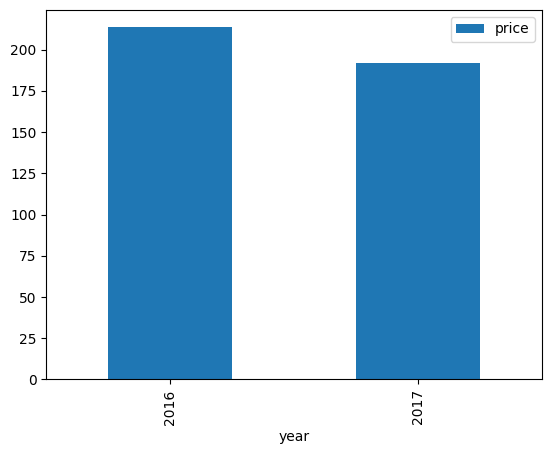

In [23]:
#How does average price flactuate in different years?
B_calendar[['year','price']].groupby(['year']).mean().plot(kind="bar")

<Axes: xlabel='month'>

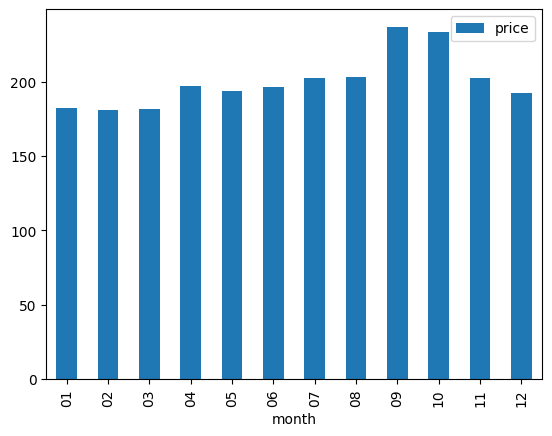

In [24]:
#How does average price flactuate in different months?
B_calendar[['month','price']].groupby(['month']).mean().plot(kind="bar")

<Axes: xlabel='day'>

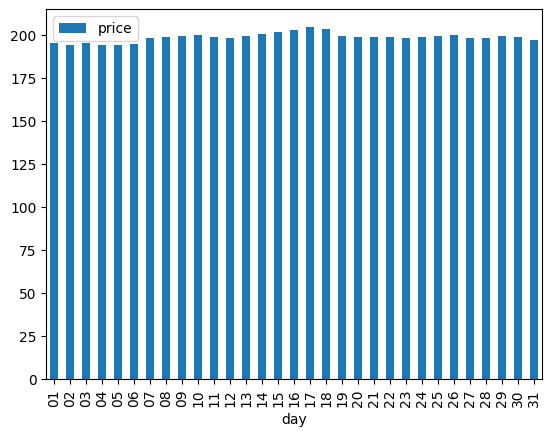

In [25]:
#How does average price flactuate in different months?
B_calendar[['day','price']].groupby(['day']).mean().plot(kind="bar")

##### Listings EDA

<Axes: xlabel='property_type'>

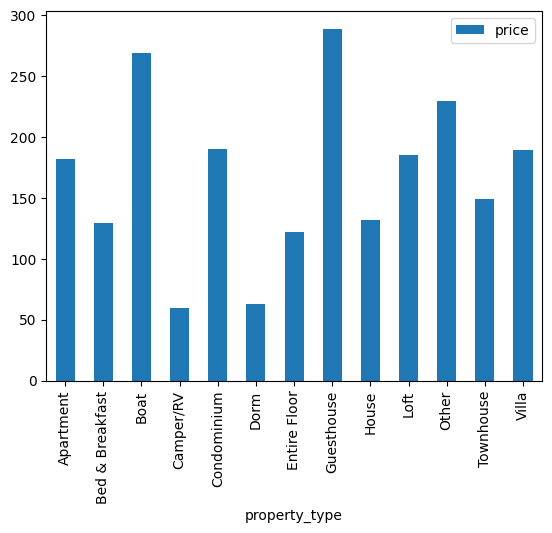

In [26]:
#Guest houses have the highest average price and RVs have the least average prices
B_listings[['price','property_type']].groupby("property_type").mean().plot(kind="bar")

<Axes: xlabel='room_type'>

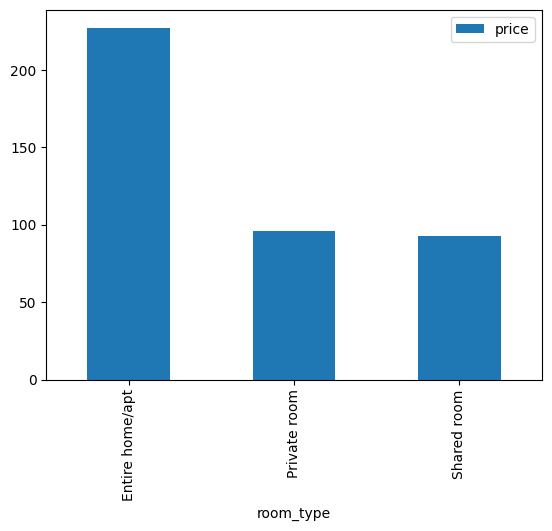

In [27]:
#apt room types have the highest average price and private rooms and shared rooms have the same average prices
B_listings[['price','room_type']].groupby("room_type").mean().plot(kind="bar")

<Axes: xlabel='bed_type'>

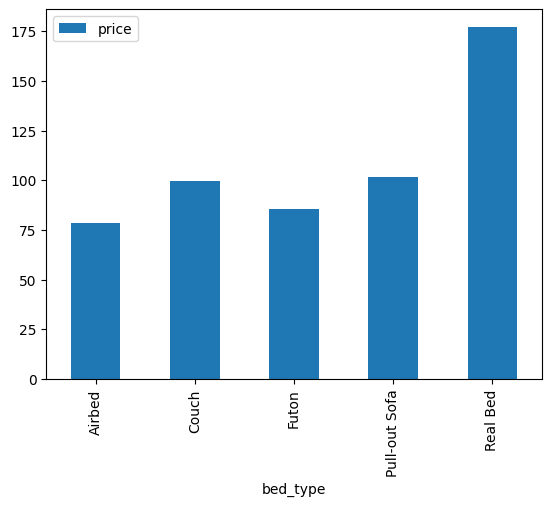

In [28]:
#rooms with real beds have the highest average price and ones with airbeds have the least average prices
B_listings[['price','bed_type']].groupby("bed_type").mean().plot(kind="bar")

In [29]:
#Property type Other with Shared rooms with airbed have the highest average price and Loft with private rooms with airbed have the least average prices
B_listings[['property_type','room_type','bed_type','price']].groupby(['property_type','room_type','bed_type']).mean().sort_values(by='price', ascending=False)

price
property_type   room_type       bed_type                
Other           Shared room     Airbed        500.000000
                Entire home/apt Real Bed      324.500000
Guesthouse      Entire home/apt Real Bed      289.000000
Boat            Private room    Real Bed      287.000000
House           Entire home/apt Real Bed      277.843537
Other           Shared room     Real Bed      270.000000
Townhouse       Entire home/apt Real Bed      268.357143
Boat            Entire home/apt Real Bed      265.200000
Villa           Entire home/apt Real Bed      263.500000
Condominium     Entire home/apt Real Bed      235.120805
Other           Shared room     Couch         225.000000
Apartment       Entire home/apt Real Bed      223.608372
Loft            Entire home/apt Real Bed      217.068966
Other           Private room    Real Bed      181.363636
Condominium     Entire home/apt Futon         163.000000
Apartment       Entire home/apt Pull-out Sofa 156.375000
Entire Floor    Entire home/apt Real Bed      154.000000
Villa           Private room    Real Bed      152.500000
Bed & Breakfast Entire home/apt Real Bed      142.500000
                Private room    Real Bed      130.921053
Apartment       Private room    Couch         126.666667
Condominium     Private room    Real Bed      110.077922
Townhouse       Private room    Real Bed      108.794872
Loft            Private room    Real Bed      105.714286
Apartment       Private room    Pull-out Sofa 103.571429
                Entire home/apt Futon         102.416667
                Private room    Real Bed      100.361149
Loft            Shared room     Real Bed       99.000000
Apartment       Shared room     Real Bed       92.742857
Entire Floor    Private room    Real Bed       90.000000
Condominium     Shared room     Pull-out Sofa  89.000000
Apartment       Shared room     Airbed         89.000000
House           Private room    Futon          87.090909
                                Pull-out Sofa  81.500000
Apartment       Private room    Futon          80.300000
House           Private room    Real Bed       80.121134
                Shared room     Pull-out Sofa  80.000000
                Private room    Airbed         73.000000
Apartment       Shared room     Pull-out Sofa  71.000000
Condominium     Private room    Futon          70.000000
Apartment       Shared room     Couch          67.250000
Loft            Shared room     Pull-out Sofa  67.000000
Condominium     Private room    Pull-out Sofa  65.000000
Dorm            Private room    Real Bed       62.500000
House           Shared room     Couch          61.000000
Apartment       Private room    Airbed         60.960000
Camper/RV       Entire home/apt Real Bed       60.000000
House           Shared room     Real Bed       59.833333
                Entire home/apt Futon          55.000000
Apartment       Shared room     Futon          54.750000
Condominium     Shared room     Real Bed       51.000000
Townhouse       Private room    Futon          48.000000
Bed & Breakfast Shared room     Real Bed       44.000000
Loft            Private room    Airbed         30.000000

##### Reviews EDA

In [30]:
#2016 has the most reviews, from 2014 to 2015 review had exponential growth
B_reviews.year.value_counts()

2016    30024
2015    23814
2014     9272
2013     2965
2012     1316
2011      664
2010      200
2009       20
Name: year, dtype: int64

In [31]:
B_reviews.month.value_counts()

08    10345
07     9333
06     8369
05     8115
04     6116
10     6095
09     5985
03     3853
11     3729
12     2252
01     2119
02     1964
Name: month, dtype: int64

In [32]:
B_reviews.day.value_counts()

19    2635
01    2452
24    2430
05    2420
22    2393
21    2366
20    2332
08    2330
15    2312
17    2284
25    2282
18    2274
28    2232
12    2224
16    2216
29    2198
27    2188
10    2156
23    2153
07    2146
13    2144
04    2136
14    2131
09    2129
30    2125
11    2118
02    2102
06    2102
26    2047
03    1878
31    1340
Name: day, dtype: int64

In [33]:
B_reviews_eda = B_reviews[B_reviews.year=='2016']
B_calendar_eda = B_calendar[B_calendar.year=='2016']

In [34]:
#cal_rev_list = .merge(,on="listing_id")
cal_rev_list = pd.concat([B_reviews_eda, B_calendar_eda], axis=1, join="inner")

In [35]:
#2016 had 30024 reviews
B_reviews_eda.shape

(30024, 9)

In [36]:
review_results_ = pd.DataFrame()

In [37]:
#Dropping null comments
cal_rev_list.dropna(subset=['comments'], inplace=True)

In [38]:
#Computing sentiment mood and polarity for reviews in 2016
for item in cal_rev_list.comments :
    blob = TextBlob(item)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentiment_mood =  "Positive"
    elif polarity < 0:
        sentiment_mood =  "Negative"
    else:
        sentiment_mood =  " Neutral"
    item_ = [{"Review_mood":sentiment_mood,"polarity":polarity,"text":item}]
    review_results_ = review_results_.append(item_, ignore_index=True)

In [88]:
#92% of reviews were positive
review_results_.groupby(['Review_mood']).agg({'Review_mood': 'count', 'polarity': 'mean'})

,Review_mood,polarity
Review_mood,,
Neutral,563,0.000000
Negative,131,-0.174340
Positive,8982,0.407853


# Preparing Data

In [40]:
#Function shows percentage of missing values in a dataframe form
def missing_value_percentages(df) :
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                    'percent_missing': percent_missing})
    return missing_value_df

In [41]:
B_calendar_missing = missing_value_percentages(B_calendar)

In [42]:
B_listings_missing = missing_value_percentages(B_listings)

In [43]:
B_reviews_missing = missing_value_percentages(B_reviews)

In [44]:
#columns with missing values
B_calendar_missing[B_calendar_missing.percent_missing>0]

,column_name,percent_missing
price,price,50.871578


In [45]:
#columns with missing values
B_reviews_missing[B_reviews_missing.percent_missing>0]

,column_name,percent_missing
comments,comments,0.077627


In [46]:
#neighbourhood_group_cleansed,license,has_availability,jurisdiction_names,square_feet has no values
B_listings_missing[B_listings_missing.percent_missing>0].sort_values(by='percent_missing', ascending=False)

,column_name,percent_missing
neighbourhood_group_cleansed,neighbourhood_group_cleansed,100.000000
license,license,100.000000
has_availability,has_availability,100.000000
jurisdiction_names,jurisdiction_names,100.000000
square_feet,square_feet,98.437936
monthly_price,monthly_price,75.230126
weekly_price,weekly_price,75.118550
security_deposit,security_deposit,62.566248
notes,notes,55.090656
interaction,interaction,43.347280


In [47]:
#columns missing more than 60% of data
B_listings_missing[B_listings_missing.percent_missing>=60]

,column_name,percent_missing
neighbourhood_group_cleansed,neighbourhood_group_cleansed,100.000000
square_feet,square_feet,98.437936
weekly_price,weekly_price,75.118550
monthly_price,monthly_price,75.230126
security_deposit,security_deposit,62.566248
has_availability,has_availability,100.000000
license,license,100.000000
jurisdiction_names,jurisdiction_names,100.000000


In [48]:
#dropping columns with more than 60%
B_listings.drop(['neighbourhood_group_cleansed','square_feet','weekly_price','monthly_price','security_deposit','has_availability','license','jurisdiction_names'],axis=1,inplace=True)

In [49]:
B_listings.rename(columns={'price': 'listing_price'}, inplace=True)

In [50]:
#Identifying numerical values
#code line from chatgpt
B_listings_numerical_columns = B_listings.select_dtypes(include=['number'])

In [51]:
#creating a dataframe of numerical values
B_listings_numerical = B_listings[list(B_listings_numerical_columns)]


In [52]:
#creating a dataframe of categorical values
B_listings_categorical = B_listings.drop(B_listings_numerical,axis=1)

In [53]:
B_listings_categorical['id'] = B_listings['id']

In [54]:
#We have 31 numerical columns from listing data
B_listings_numerical.shape

(3585, 31)

In [55]:
#We have 57 categorical columns from listing data
B_listings_categorical.shape

(3585, 57)

In [57]:
#Imputing bedrooms,beds, and bathrooms with mean of colums because they cannot assume value 0
B_listings_numerical.bedrooms = B_listings_numerical.bedrooms.fillna(B_listings_numerical.bedrooms.mean())
B_listings_numerical.beds = B_listings_numerical.beds.fillna(B_listings_numerical.beds.mean())
B_listings_numerical.bathrooms = B_listings_numerical.bathrooms.fillna(B_listings_numerical.bathrooms.mean())
#imputing all other remaining missing columns with 0
B_listings_numerical = B_listings_numerical.fillna(0)

In [58]:
#merging categorical data and numerical data
cat_num_B_listings = B_listings_categorical.merge(B_listings_numerical,on="id")

In [59]:
#picking 2016 year available calendar listings 
B_calendar = B_calendar[(B_calendar.year=='2016') & (B_calendar.available=='t')]

In [60]:
#Imputing price with 0
B_calendar['price'] = B_calendar['price'].fillna(0)

In [61]:
#Dropping null rows in the column comments
B_reviews.dropna(subset=['comments'], inplace=True)

In [62]:
cat_num_B_listings.rename(columns={'id': 'listing_id'}, inplace=True)

In [63]:
#merging listing with calendar
listings_calendar = B_calendar.merge(cat_num_B_listings,on="listing_id")

In [64]:
listings_calendar.shape

(190631, 93)

In [65]:
#casting day to integer
listings_calendar['day'] = listings_calendar['day'].astype(int)

In [66]:
#casting month to integer
listings_calendar['month'] = listings_calendar['month'].astype(int)

In [67]:
#casting year to integer
listings_calendar['year'] = listings_calendar['year'].astype(int)

In [68]:
listings_calendar_ = listings_calendar.copy()

In [69]:
#exporting correlations
listings_calendar.drop(["listing_id","date"],axis=1).corr()['listing_price'].to_csv("correlations_price.csv")

In [70]:
#predictors, variables with correlation greater than 0.2
predictors_target = ['host_listings_count','host_total_listings_count','latitude','price','accommodates','bathrooms','bedrooms','beds','listing_price','cleaning_fee','guests_included','extra_people']

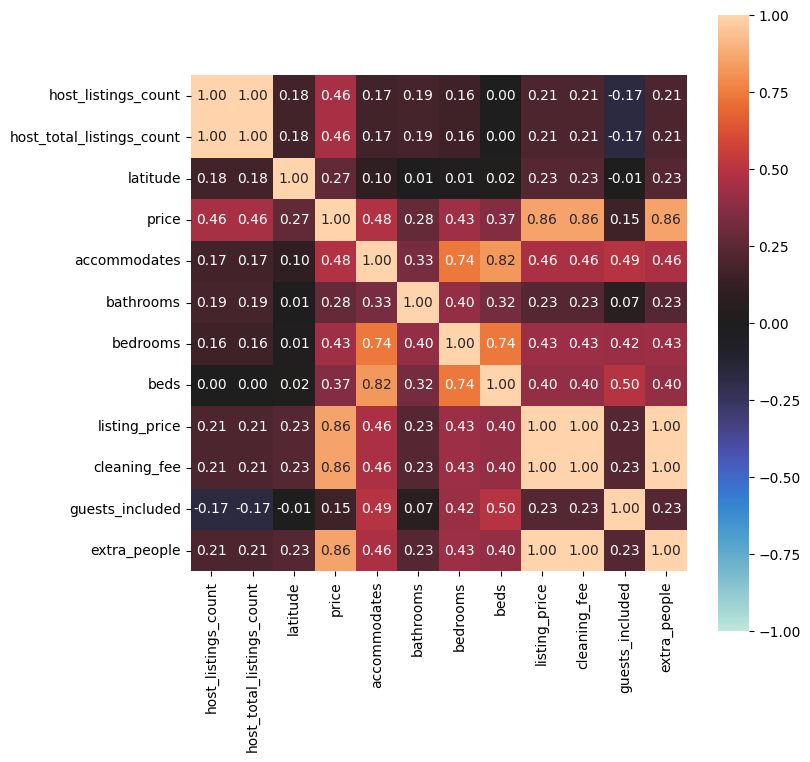

In [71]:
#visualizing correlations
import dython
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features = identify_nominal_columns(listings_calendar_[predictors_target])

associations(listings_calendar_[predictors_target], 
            nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson',  
            ax=None, annot=True, fmt='.2f',cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, 
            compute_only=False, clustering=False, title=None, filename=None, 
            figsize=(8,8));

In [72]:
#dropping duplicating columns
listings_calendar = listings_calendar.drop_duplicates()

In [73]:
#picking training data
training_data = listings_calendar_[predictors_target]

In [74]:
#training data has 190k rows and 12 columns
training_data.shape

(190631, 12)

# Data Modelling

##### The proposed model to be used is random forest regessor as we are solving a regession problem because of it's accuracy and ability to be able to handle outliers. I also is able to handle over-fitting.

In [75]:
#picking predictors
X = training_data.drop('listing_price',axis=1)

In [76]:
#picking target
y = training_data['listing_price']

In [77]:
#normalizing our data using min-max scaler
mms = MinMaxScaler()
mms.fit(X)
data_transformed = mms.transform(X)

In [78]:
#splitting data into training and test data
train_X, test_X, train_Y, test_Y = train_test_split(data_transformed,y, test_size = 0.2,random_state=2)

In [79]:
#training our model
print('Initializing model...')
rf = RandomForestRegressor(n_estimators = 400, max_features = 'log2', max_depth = 7, random_state = 18)
print('Done initializing model!')
print('Training model...')
rf.fit(train_X, train_Y)
print('Done training model!')
print('Predicting on train and test...')
pred_train_rr= rf.predict(train_X)
pred_test_rr= rf.predict(test_X)
print('Done predicting on train and test!')

Initializing model...
Done initializing model!
Training model...
Done training model!
Predicting on train and test...
Done predicting on train and test!


# Evaluating Results

In [80]:
#Checking f our two metrics are consistent on both training and test data, if they are we can assume that our model does not overfit.
print('MAE - Training :',metrics.mean_absolute_error(train_Y,pred_train_rr))
print('R2 - Training :',r2_score(train_Y, pred_train_rr))
print('-------------------------')
print('MAE - Test :',metrics.mean_absolute_error(test_Y,pred_test_rr))
print('R2 - Test :',r2_score(test_Y, pred_test_rr))

MAE - Training : 4.71051879822275
R2 - Training : 0.9967440040680249
-------------------------
MAE - Test : 4.710526099298613
R2 - Test : 0.9968834240545186


In [81]:
#Perfoming cross validation with 5 splits of data gives consistent scores which give us comfort in assuming that the model does not overfit
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import StratifiedKFold
kf=KFold(n_splits=5)
score=cross_val_score(rf,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.99350553 0.97011684 0.97744983 0.63723453 0.98770561]
Average Cross Validation score :0.9132024676708191


##### From the results metrics we got, our MAE is $4.7 which is the potential error our model might miss the prediction listing price with. Is the $4.7 miss bad? Not at all because our average listing price $198. Our R2 is 0.99 which means that our predictors are able to predict our target variable accurately.Our model was tested for over-fitting using cross-validation and train-test consistency and proved not to be overfitting. From another analysis we found that 92% of reviews in 2016 were positive.

##### Do we need to tune our parameters? With the results we have we can be comfortable with our model perfomance. 

# Conclusion

##### We used 2016 data because it was the only year that was available in all dates on our datasets hence we were able to do complete data merges for more insights. We were able to predict listing prices, and able to have a view of reviews and their stats.